### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

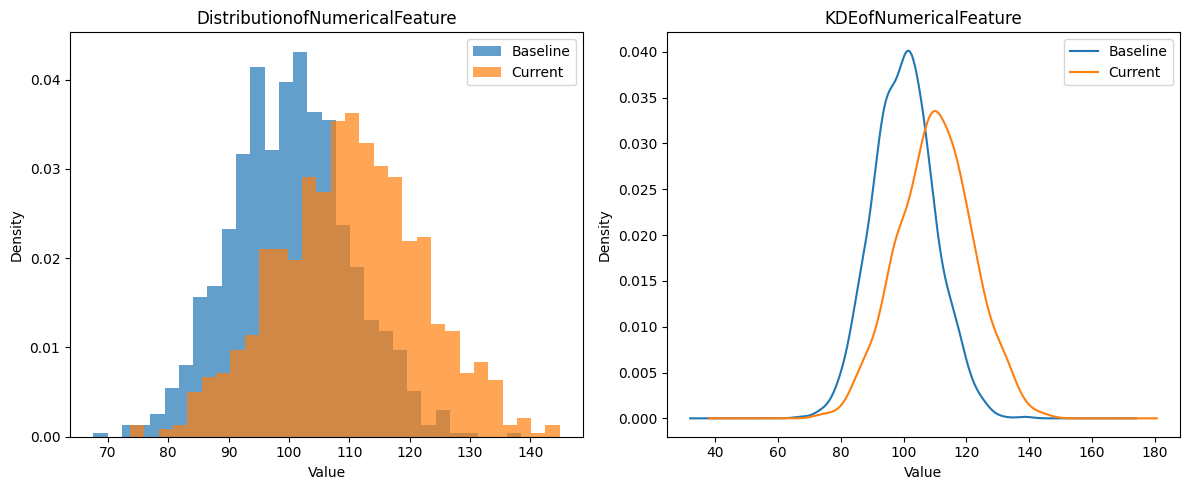

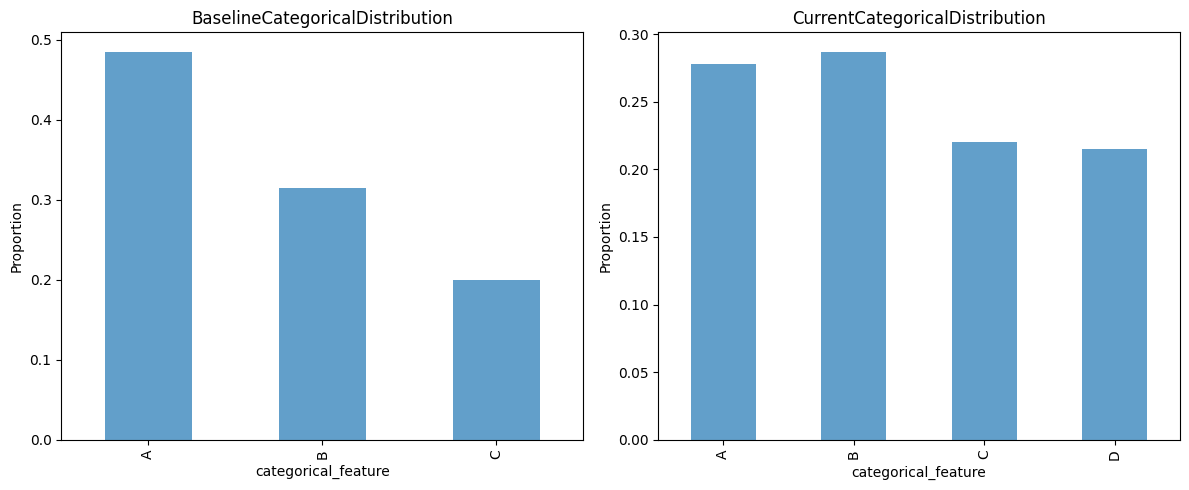

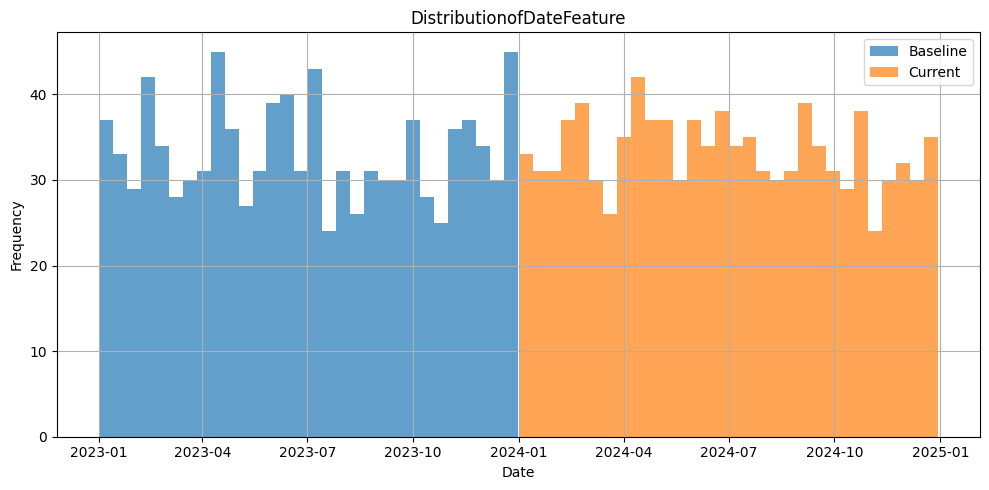

In [ ]:
# Write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

#GenerateBaselineDataset
np.random.seed(42)
baseline_data={
'numerical_feature':np.random.normal(loc=100,scale=10,size=1000),
'categorical_feature':np.random.choice(['A','B','C'],size=1000,p=[0.5,0.3,0.2]),
'date_feature':[datetime(2023,1,1)+timedelta(days=int(x))for x in np.random.randint(0,365,1000)],
'another_num_feature':np.random.rand(1000)*50
}
df_baseline=pd.DataFrame(baseline_data)
#GenerateCurrentDatasetwithDrift
np.random.seed(43)
current_data={
'numerical_feature':np.random.normal(loc=110,scale=12,size=1000),#Meanandscaledrift
'categorical_feature':np.random.choice(['A','B','C','D'],size=1000,p=[0.3,0.3,0.2,0.2]),#Proportionandnewcategorydrift
'date_feature':[datetime(2024,1,1)+timedelta(days=int(x))for x in np.random.randint(0,365,1000)],#Timedrift
'another_num_feature':np.random.rand(1000)*55#Slightscaledrift
}
df_current=pd.DataFrame(current_data)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df_baseline['numerical_feature'],bins=30,alpha=0.7,label='Baseline',density=True)
plt.hist(df_current['numerical_feature'],bins=30,alpha=0.7,label='Current',density=True)
plt.title('DistributionofNumericalFeature')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.subplot(1,2,2)
df_baseline['numerical_feature'].plot(kind='kde',label='Baseline')
df_current['numerical_feature'].plot(kind='kde',label='Current')
plt.title('KDEofNumericalFeature')
plt.xlabel('Value')
plt.legend()
plt.tight_layout()
plt.show()
fig,axes=plt.subplots(1,2,figsize=(12,5))
df_baseline['categorical_feature'].value_counts(normalize=True).sort_index().plot(kind='bar',ax=axes[0],alpha=0.7,title='BaselineCategoricalDistribution')
axes[0].set_ylabel('Proportion')
df_current['categorical_feature'].value_counts(normalize=True).sort_index().plot(kind='bar',ax=axes[1],alpha=0.7,title='CurrentCategoricalDistribution')
axes[1].set_ylabel('Proportion')
plt.tight_layout()
plt.show()

#VisualizeDateFeatureDrift(TemporalDistribution)
plt.figure(figsize=(10,5))
df_baseline['date_feature'].hist(bins=30,alpha=0.7,label='Baseline')
df_current['date_feature'].hist(bins=30,alpha=0.7,label='Current')
plt.title('DistributionofDateFeature')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()